In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### The following data analysis consists of:
### basic EDA analysis- shape, missing value, data types
### outlier detetction and treatment
### univariate analysis and summary
### bivariate analysis and summary
### data correlation
### probability calculations
### summary and recommendations

### ---------------

In [84]:
df = pd.read_csv("fitness_treadmill.txt")

# Lets start with basic EDA, like
### -  checking shape of data
### -  check data types
### -  checking presenece of null/missing data 
### -  and some statistics using describe 

In [85]:
df.shape

(180, 9)

In [86]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#few definitions

###-usage: number of times user plan to use in a week
###fitness: user rates themselves in scale of 1-5 of their own fitness (1: poor, 5: good)
###miles: miles that user plan to cover in a week
###education: education in number of years

In [87]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [89]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

### we can see that there are no null values present in the data

In [90]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [91]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


### Age: is integer data type with min value as 18years and max value as 50 years. Mean and Median looks similar with std deviation ~7years
### Education: seems to be discrete data types with min value as 12 and max as 21
### Usage: is also discrete data types with min value as 2 and max value as 7. This imples use plan to run atleast 2 days in a week if they buy a treadmill and maximum they plan to use all 7 days
### Fitness: Min value is 1 and max value is 5
### Income: numeric data type with min value as ~29k and max value as ~105k. Standard deviation of 16k shows good spread in the data. Mean is pulled little on higher side, may be due to presence of outliers
### Miles: numeric data type with min value as 21 and max value as 360. This is miles that user plan to cover in a week. Mean value is higher than Median - perhaps due to outliers. Standard deciation of 51 shows good spread in the data

In [92]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [93]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [94]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [95]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [96]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [97]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

### above are unique values in categorical data which shows profile of users
### Product: 3 types of product is listed 
### Gender : male/female
### Marital status: single/partnered
### Education: level of education in years (ordinal in nature)
### Usage : 2-7 days in a week (ordinal)
### Fitness: self rated fitness value. 1 being poor and 5 being fitness concious people (ordinal)

# Outlier treatment. Lets see presence of outliers in numeric datatypes: Miles and Income

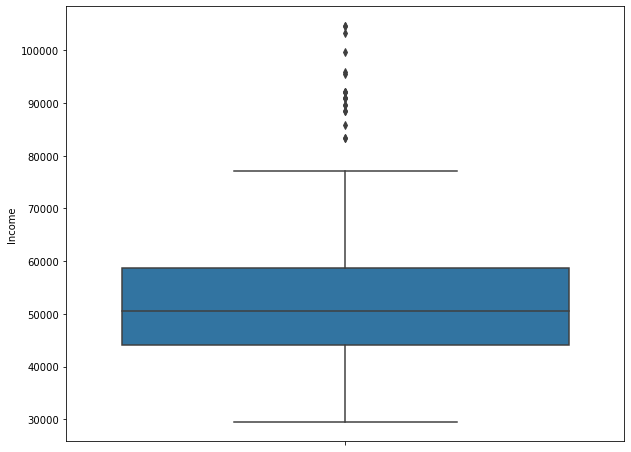

In [98]:
plt.figure(figsize=(10,8))
sns.boxplot(y = 'Income', data =df)
plt.show()

### I have used IQR method to remove outliers as: data + 1.5*IQR and data - 1.5*IQR. Any data between these ranges are representative data for the analysis

In [99]:
q1 = df['Income'].quantile(0.25)
q3 = df['Income'].quantile(0.75)
iqr = q3-q1
df_clean_for_income = df.loc[(df['Income'] > (q1 - 1.5 * iqr)) & (df['Income'] < (q1 + 1.5 * iqr))]
df_clean_for_income.drop_duplicates(inplace=True)
df_clean_for_income.reset_index(drop=True,inplace=True)
df_clean_for_income.shape

(153, 9)

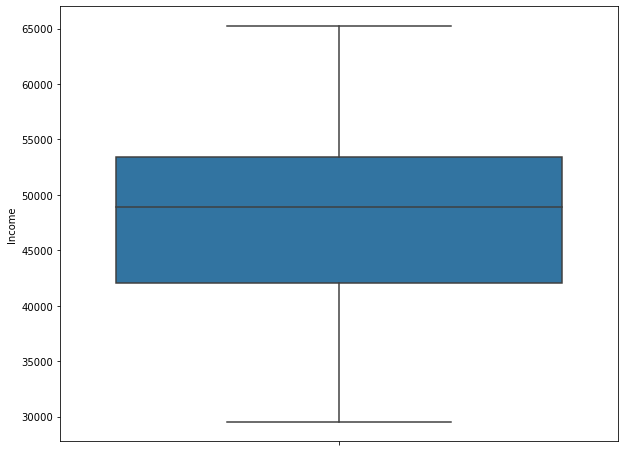

In [100]:
plt.figure(figsize=(10,8))
sns.boxplot(y = 'Income', data =df_clean_for_income)
plt.show()

### we dont see extra points along the upper whisker implying cleaned data

### lets do same for "Miles"

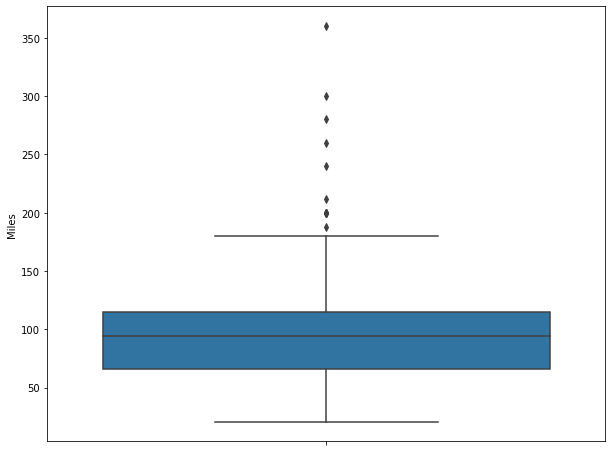

In [101]:
plt.figure(figsize=(10,8))
sns.boxplot(y = 'Miles', data =df)
plt.show()

In [102]:
q1 = df_clean_for_income['Miles'].quantile(0.25)
q3 = df_clean_for_income['Miles'].quantile(0.75)
iqr = q3-q1
df_clean_for_miles = df_clean_for_income.loc[(df_clean_for_income['Miles'] > (q1 - 1.5 * iqr)) & (df_clean_for_income['Miles'] < (q1 + 1.5 * iqr))]
df_clean_for_miles.drop_duplicates(inplace=True)
df_clean_for_miles.reset_index(drop=True,inplace=True)
df_clean_for_miles.shape

(131, 9)

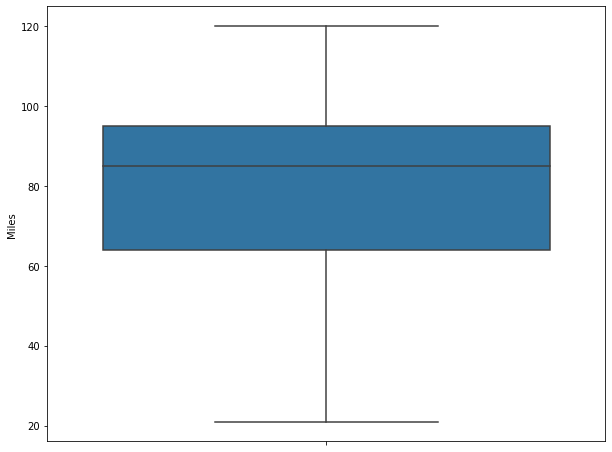

In [103]:
plt.figure(figsize=(10,8))
sns.boxplot(y = 'Miles', data =df_clean_for_miles)
plt.show()

### We can see reduction of 28% of size of data upon cleaning. Since there is no evidence that they are real or some erroneous data points, I have decided to keep them for deriving the conclusions

In [104]:
df_clean = df_clean_for_miles.copy()

# First, lets do UNIVARIATE analysis of the data. Few questions to ask from the data are:
### what is the percentage distribution of products, gender, marital status, usage, fitness, education

percentage distribution values: Product
-------
KP281    44.0
KP481    33.0
KP781    22.0
Name: Product, dtype: float64


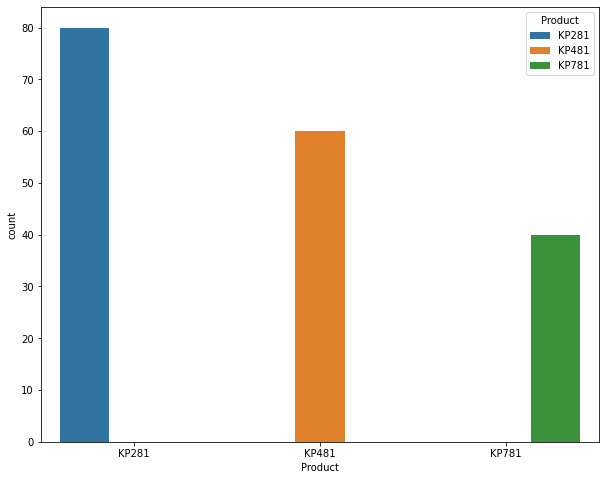

####################
 
percentage distribution values: Gender
-------
Male      58.0
Female    42.0
Name: Gender, dtype: float64


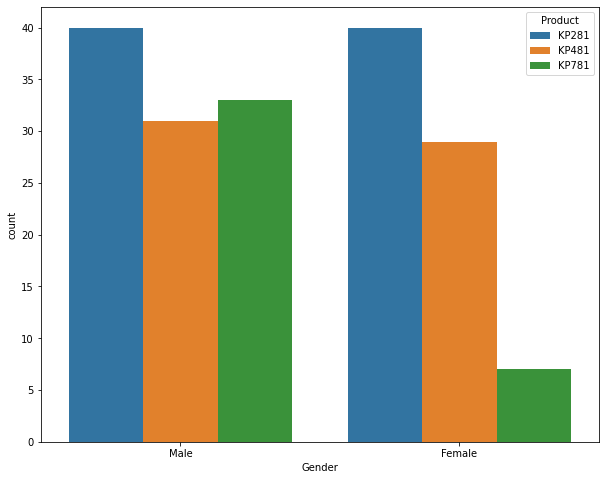

####################
 
percentage distribution values: MaritalStatus
-------
Partnered    59.0
Single       41.0
Name: MaritalStatus, dtype: float64


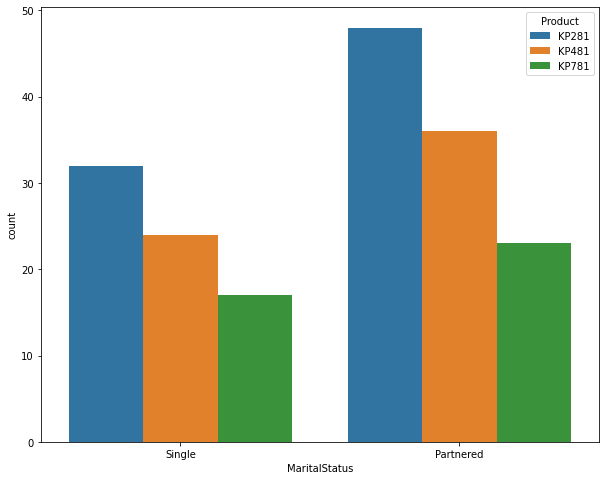

####################
 
percentage distribution values: Education
-------
16    47.0
14    31.0
18    13.0
13     3.0
15     3.0
12     2.0
21     2.0
20     1.0
Name: Education, dtype: float64


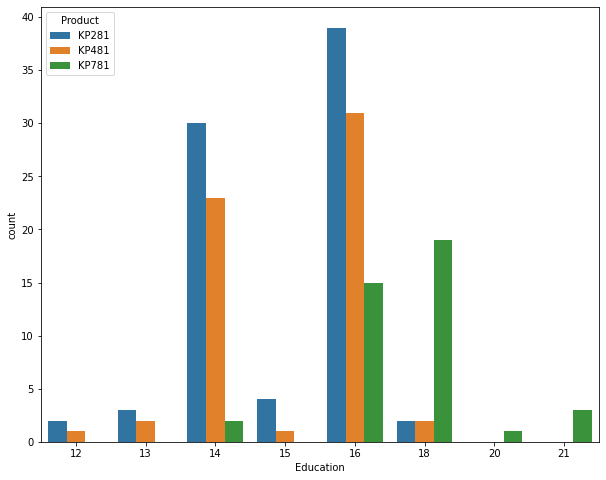

####################
 
percentage distribution values: Usage
-------
3    38.0
4    29.0
2    18.0
5     9.0
6     4.0
7     1.0
Name: Usage, dtype: float64


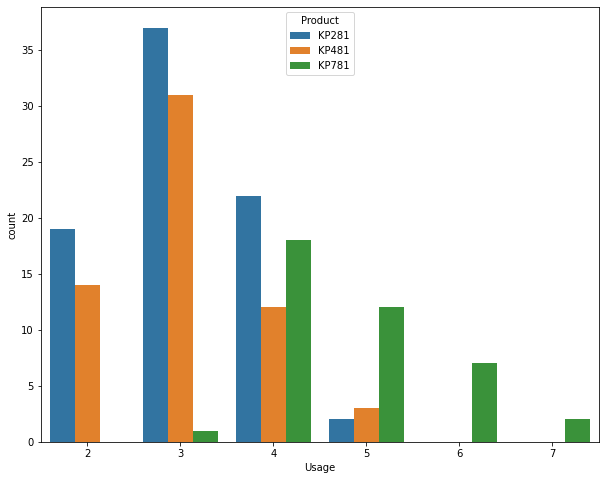

####################
 
percentage distribution values: Fitness
-------
3    54.0
5    17.0
2    14.0
4    13.0
1     1.0
Name: Fitness, dtype: float64


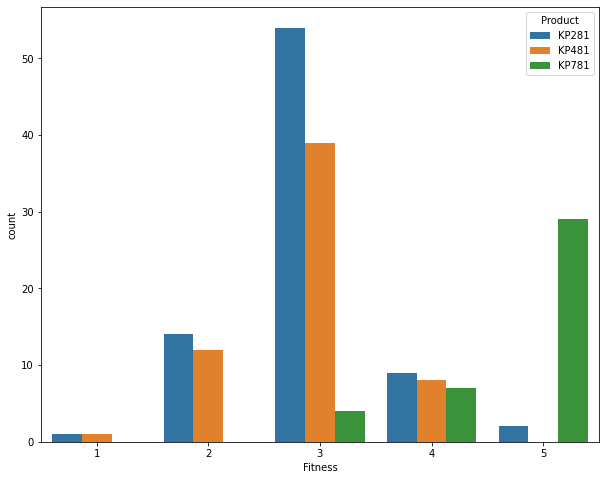

####################
 


In [105]:
cols = ['Product', 'Gender', 'MaritalStatus', 'Education','Usage', 'Fitness']
for col in cols:
    print(f"percentage distribution values: {col}")
    print("-------")
    print(round(df[col].value_counts(normalize=True),2)*100)
    plt.figure(figsize=(10,8))
    sns.countplot(x = col ,data =df, hue = 'Product')
    plt.show()
    print("####################")
    print(' ')
    

# Conclusions from above univariate plots:

### Product: KP281 is distributed along 44% of data which is low-end product whereas high-end KP781 is distributed with 22% in data .
### Gender: 58% are males in the data whereas 42% are females
### Marital status: 59% people are partnered whereas 41% are single
### Education: More than 85% of data have people who have completed 14-16 years of education 
### Usage: more than 85% of people are commited to use the product for 2-4 times in a week
### Fitness: ~99% data have people reporting themseleves to be >=2 fitness level. ~25% are on higher side (4-5 fitness level)

### -------------------

In [106]:
%matplotlib inline

# lets try to find out relationship between these attributes by doing some bivariate analysis

### I have put numeric data Age, Income, Miles along y-axis and categorical data along x-axis. So, I have used box plots for these. In all these plots, hue is kept as "Product" to see distribution of data wrt to product categories


------------- Analysis of feature: Age --------------------
 


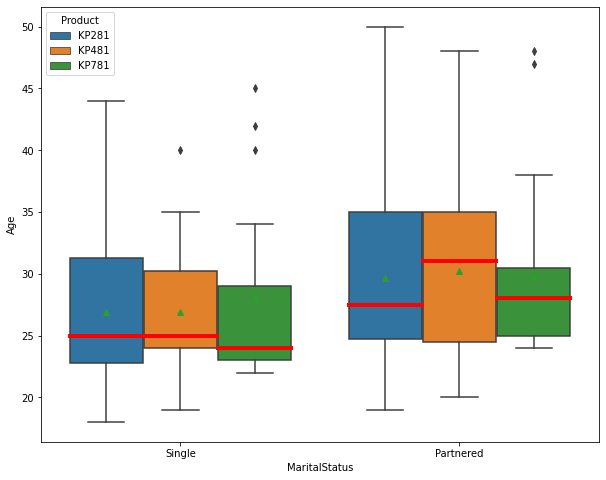

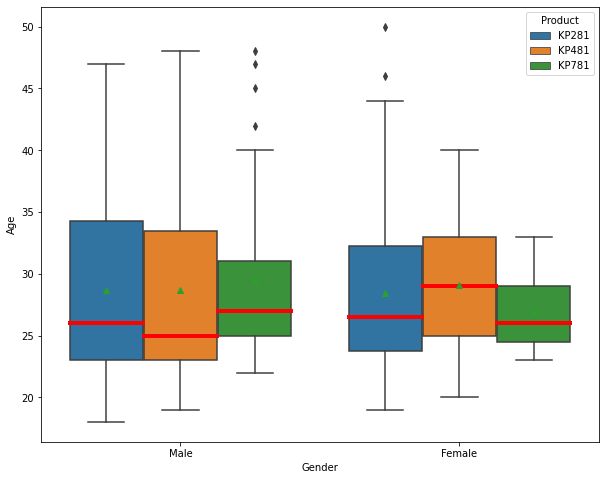

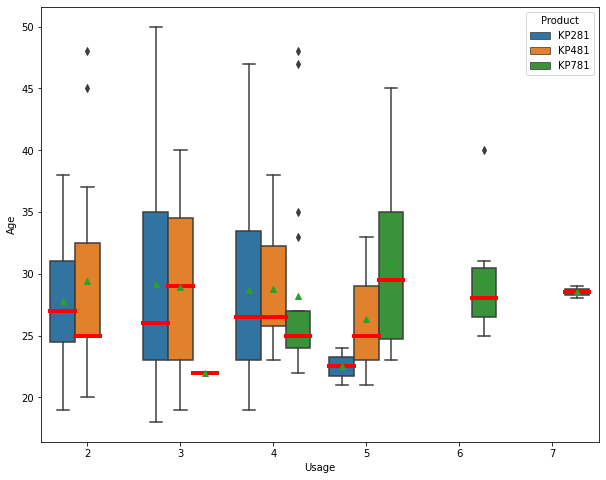

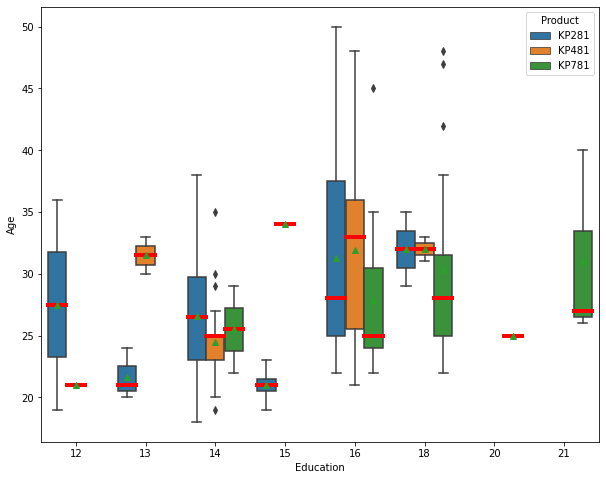

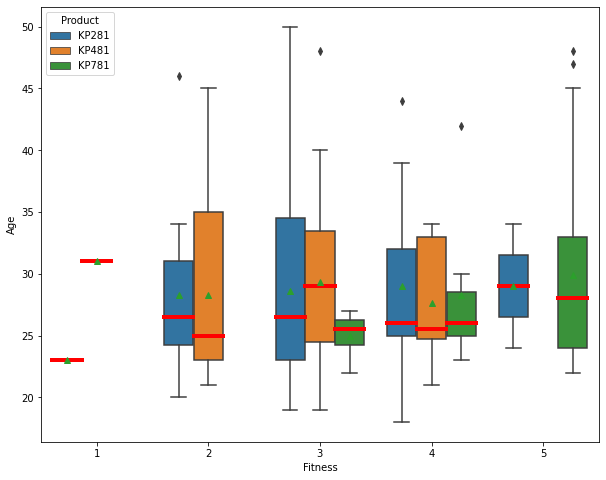


######################################################################


------------- Analysis of feature: Income --------------------
 


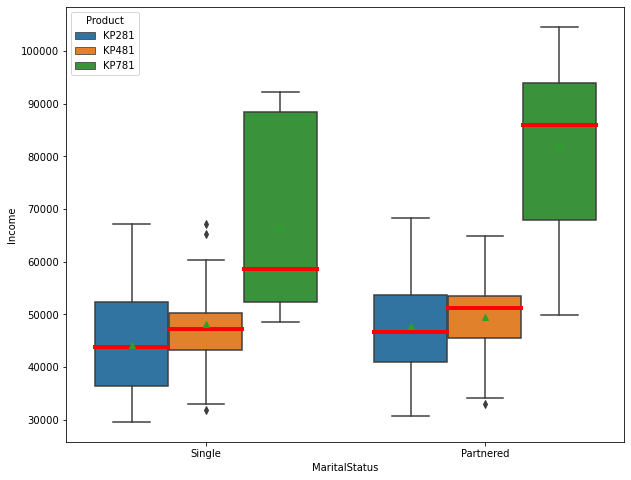

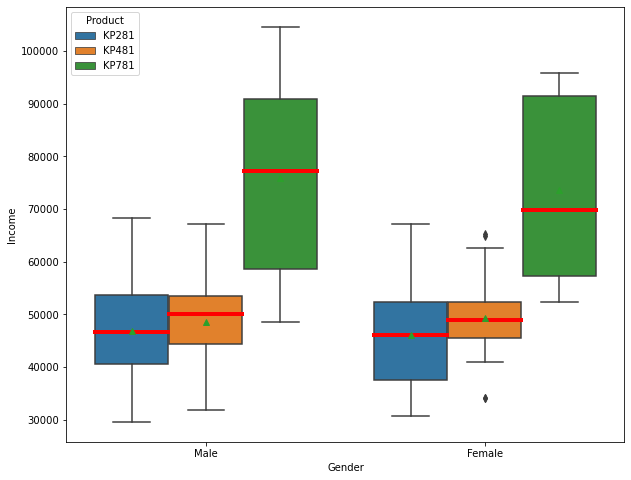

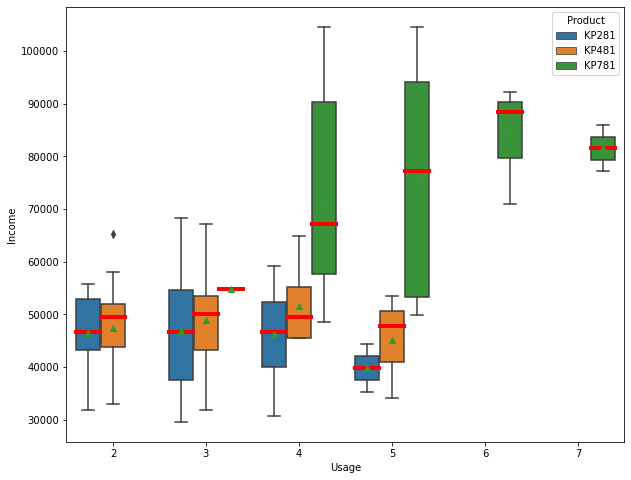

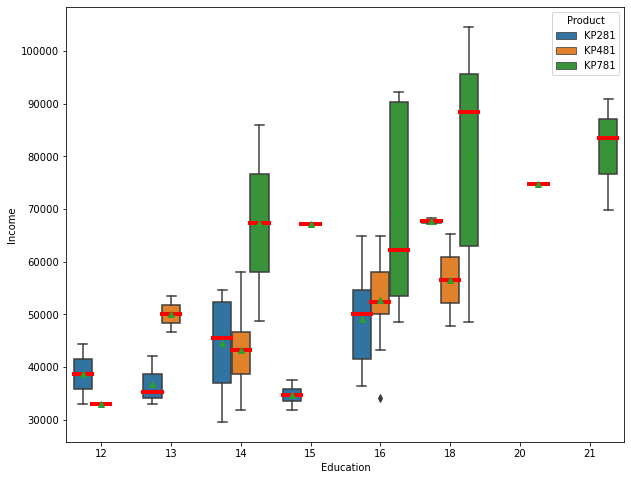

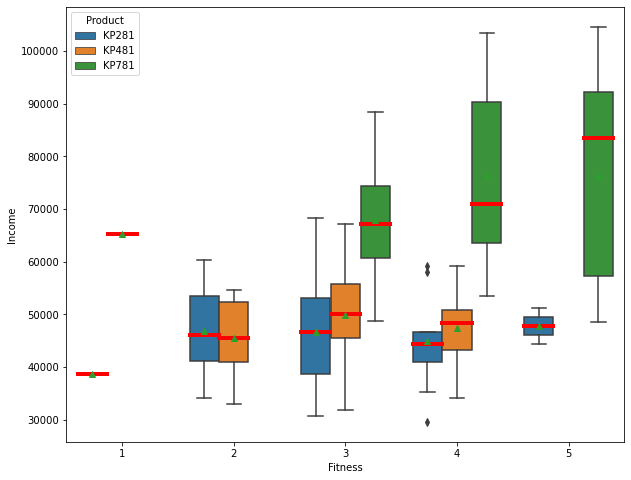


######################################################################


------------- Analysis of feature: Miles --------------------
 


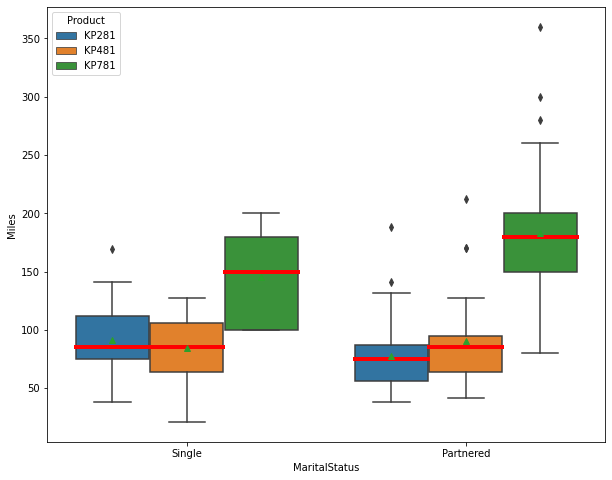

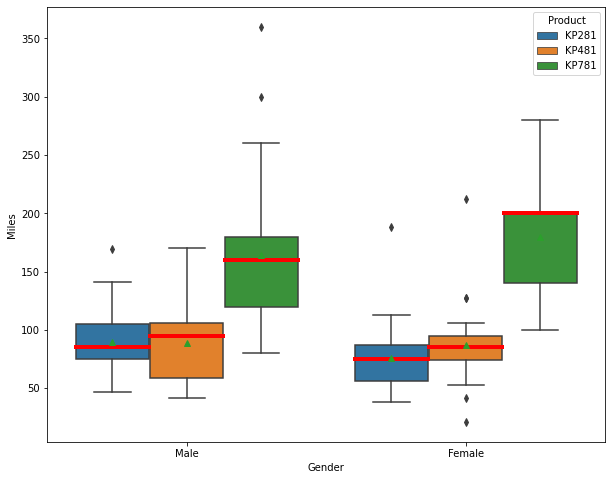

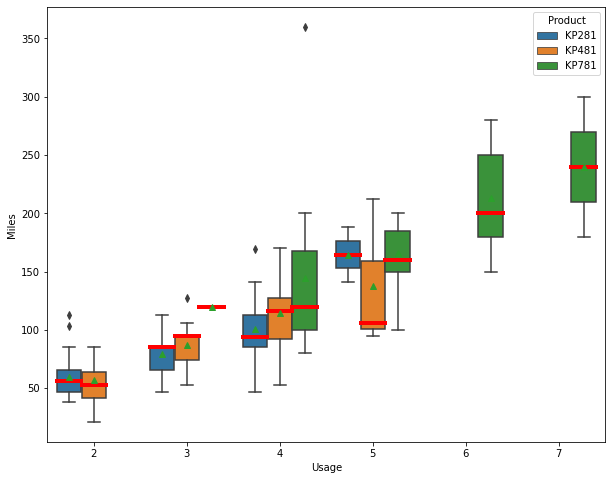

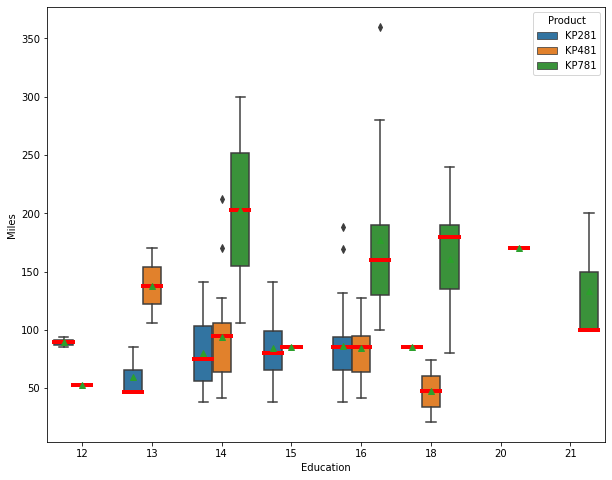

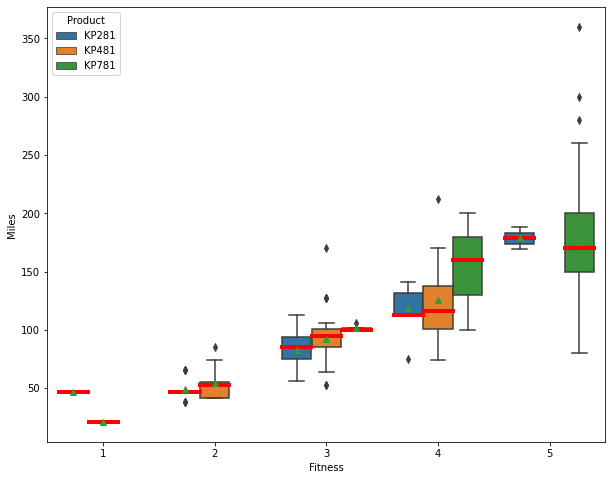


######################################################################




In [107]:
num_col = ['Age',  'Income', 'Miles']

for col in num_col:
    
    print(f"------------- Analysis of feature: {col} --------------------")
    print(" ")
    
    plt.figure(figsize=(10,8))
    sns.boxplot(x = 'MaritalStatus', y =  col, data = df, hue = 'Product',  showmeans=True, medianprops = dict(linestyle='-',linewidth=4, color='r'))
    plt.show()
    
    print(" ")
    
    
    plt.figure(figsize=(10,8))
    sns.boxplot(x = 'Gender', y =  col, data = df, hue = 'Product',  showmeans=True, medianprops = dict(linestyle='-',linewidth=4, color='r'))
    plt.show()
    
    print(" ")

    
    plt.figure(figsize=(10,8))
    sns.boxplot(x = 'Usage', y =  col, data = df, hue = 'Product',  showmeans=True, medianprops = dict(linestyle='-',linewidth=4, color='r'))
    plt.show()
    
    print(" ")
    
    
    plt.figure(figsize=(10,8))
    sns.boxplot(x = 'Education', y =  col, data = df, hue = 'Product',  showmeans=True, medianprops = dict(linestyle='-',linewidth=4, color='r'))
    plt.show()
    
    print(" ")
    
    
    plt.figure(figsize=(10,8))
    sns.boxplot(x = 'Fitness', y =  col, data = df, hue = 'Product',  showmeans=True, medianprops = dict(linestyle='-',linewidth=4, color='r'))
    plt.show()
    

    
    
    print("")
    print("######################################################################")
    print("")
    print("")

    
    

# conclusions from above bivariate analysis:

### Age vs MaritalStatus : People are have age>28 and are Partnered have higher probability of using product, irrespective of any variant. 
### Age vs Gender : People are have age between 25-28years and Male have higher probability of using KP781 than Females. 
### Age vs Usage: People who have rated themselves for higher usage(>6) prefer to use KP781. 
### Age vs Education: people who ahve completed 16years of education and in age >25years, have higher probability of using KP781. 
### Age vs Fitness: for similar age group of people, people who have rated themseleves 3 prefer to use KP281 more than KP781 and for those rated 5 prefer to use KP 781 more than KP281. 

### ------------------


### Income vs MaritalStatus: Irrespective of Marital Status, higher income (>60k) individual prefer KP781
### Income vs Gender: Irrespective of Male or females, higher income individual prefer KP781
### Income vs usage: Higher income (>60k) prefer to rate themseleves >3 on usage and prefer KP781
### Income vs Education: For education years>14 years, higher income people (>60k) prefer to use KP781 more.
### Income vs Fitness: Higher Income people (>60K) always rate themselevs greater than 3 on fitness scale and prefer to go for KP781. We can target these people who have lower income (<55k) and rate themseleves >3 on fitness scale to switch to KP781.
### ------------------


### Miles vs MaritalStatus: Irrespective of Marital Status, people who have higher Miles target prefer to use KP781. For Miles<100, people prefer to use KP281 and KP481.
### Miles vs Gender: For Miles target <100, people prefer to use KP281 and KP481 irrespective of gender. 
### Miles vs usage: People who have rated themseleves for higher usage >4days and have higher Miles target prefer to use KP781
### Miles vs Education: Irrespective of Education, people who have rated themselevs very high on Miles target, prefer to use KP781.
### Miles vs Fitness: people who rate themselevs high on fitness (5) have greater miles target and they prefer to use KP781

### ------------------





In [108]:
%matplotlib inline

# lets try to calculate Marginal and Conditional Probabilites  of using products given each of features. 
### I have used cross-tabs with normalize=True and margins =True.


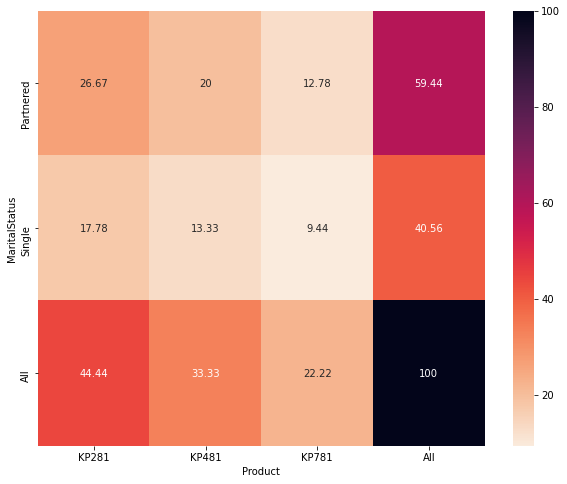

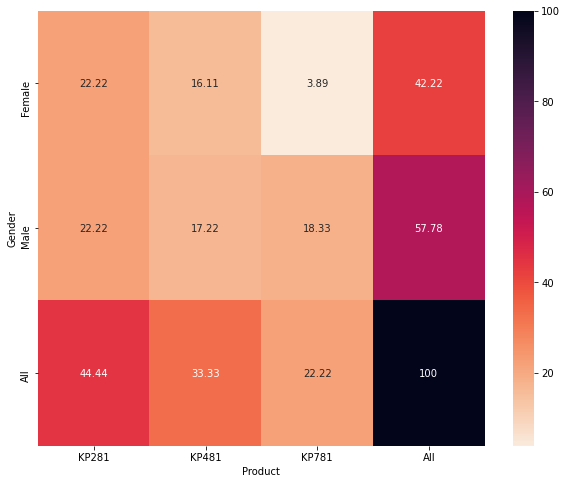

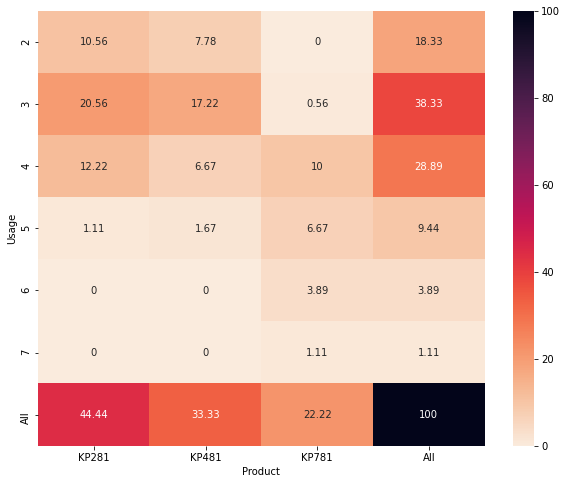

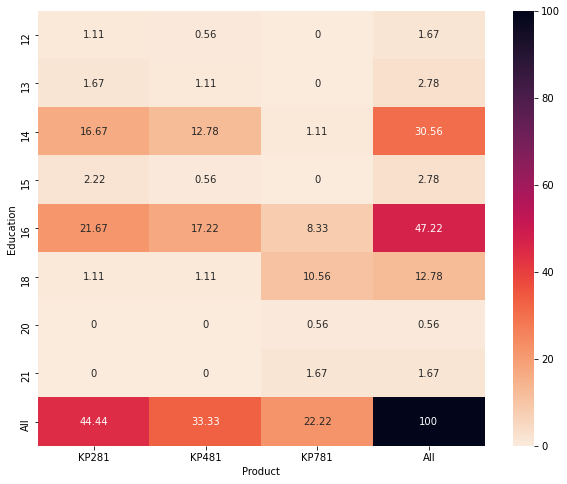

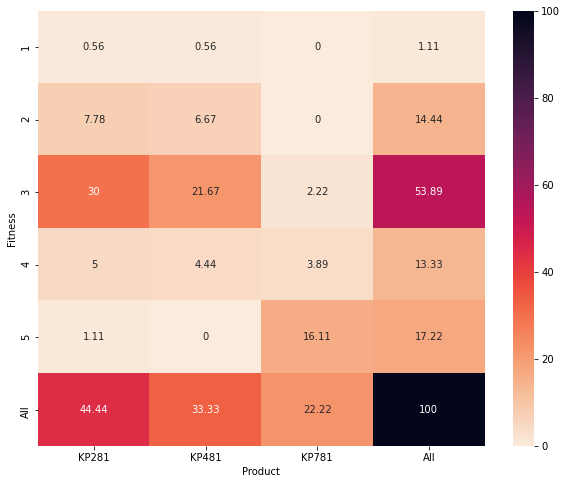

In [109]:

plt.figure(figsize=(10,8))
cross = round(pd.crosstab(index = df['MaritalStatus'],columns = df['Product'], normalize = True, margins =True),4)*100
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g')
plt.show()

print(" ")

plt.figure(figsize=(10,8))
cross = round(pd.crosstab(index = df['Gender'],columns = df['Product'], normalize = True, margins =True),4)*100
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g')
plt.show()

print(" ")

plt.figure(figsize=(10,8))
cross = round(pd.crosstab(index = df['Usage'],columns = df['Product'], normalize = True, margins =True),4)*100
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g')
plt.show()

print(" ")


plt.figure(figsize=(10,8))
cross = round(pd.crosstab(index = df['Education'],columns = df['Product'], normalize = True, margins =True),4)*100
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g')
plt.show()
print(" ")


plt.figure(figsize=(10,8))
cross = round(pd.crosstab(index = df['Fitness'],columns = df['Product'], normalize = True, margins =True),4)*100
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g')
plt.show()

    

###  Marital Status: probability(using KP-281|partnered) = 27% and probability(using KP-781|partnered) = 13% whereas probability(using KP-281|single) = 18% and probability(using KP-781|single) = 9% with probability(single) = 40% and probability(partnered) = 60%

### Gender: probability(using KP-781|Male) = 18% and probability(using KP-781|Female) = 4% whereas probability(using KP-281|Male) is same as probability(using KP-281|Female) which is 22% with probability(male) = 58% and probability(female) =42%

### Usage: When probability(usage =3) = 38%,probability(using KP781|usage = 3) ~ 1%, whereas probability(using KP281|usage = 3) ~ 21%. But, if we combine marginal probabilities, probability(using KP781|usage>6) = 5% whereas is it 0 for KP281 and KP481. For usage<=4, total probability(using KP281|usage<=4) = 42%  (sum of individual probabilities for usage =4,3,2,1) whereas it is 11% for KP781.

### Education: When probability(education=16years) = 47%, marginal probability is P(using KP781|education = 16years) = 8% whereas  P(using KP281|education = 16years) = 22%

### Fitness : When probability(rating= 3)=54%, P(using KP281|Fitness=3) = 30% whereas P(using KP781|fitness=3)= 2%. Whereas when probability(rating= 5)=16%, marginal probability(using KP781|Fitness=5)= 16% and P(using KP281|fitness =5) = 1%

### --------------------


# lets try to see correlation between variables using corr function which uses Pearson correlation formula

### Income, Education, Fitness and usage are ordinal variables, we can use following correlation plot for insights.

In [110]:
corr = df.corr()
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


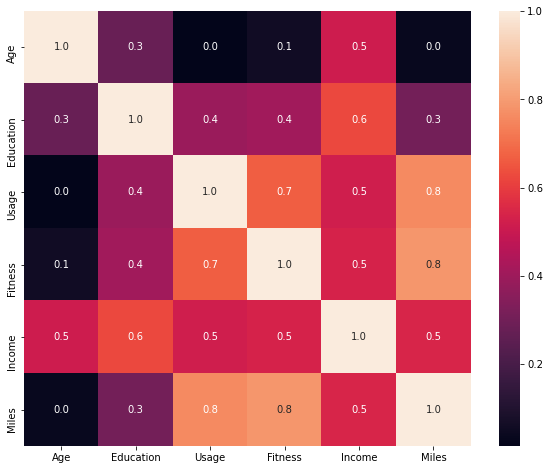

In [111]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt = '.1f')
plt.show()

### variables Income is showing 50-60% correlated with Age,Education, Usage, Fitness and Miles implying higher income people are more educated, and fitness concious. 
### when usage is more, Fitness is also more or vice-versa. 

# lets do some scatter plot to understand more

<Figure size 864x576 with 0 Axes>

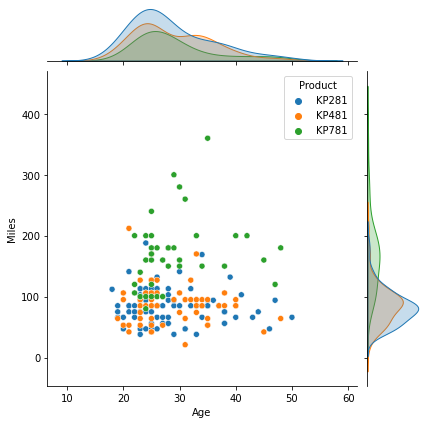

In [112]:
plt.figure(figsize=(12,8))
sns.jointplot(data = df, x = 'Age', y = 'Miles', hue = 'Product',sizes=10)
plt.show()

### people who wanted to cover more Miles prefer high-end KP781 product. For miles in range of 50-120, people can go either KP281 or KP-481.

<Figure size 864x576 with 0 Axes>

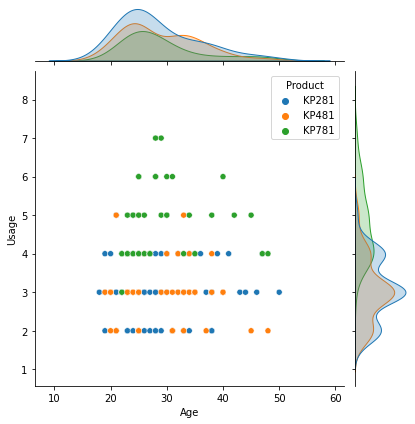

In [113]:
plt.figure(figsize=(12,8))
sns.jointplot(data = df, x = 'Age', y = 'Usage', hue = 'Product',sizes=10)
plt.show()

### people who are in age group 20-30 and rated themseleves for higher usage, prefer high end KP-781 product. For lower usage, distinction between KP-281 and KP-481 dont matter much

<Figure size 864x576 with 0 Axes>

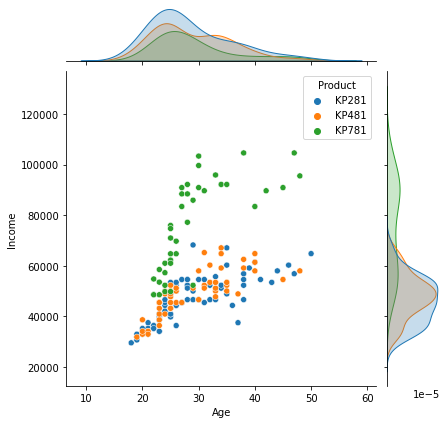

In [114]:
plt.figure(figsize=(12,8))
sns.jointplot(data = df, x = 'Age', y = 'Income', hue = 'Product',sizes=10)
plt.show()

### HIgher income people clearly prefer KP-781 irrespective of age.

# if we want to know average Income values vs prefered product or average miles people want to run vs prefered product, we can see below charts

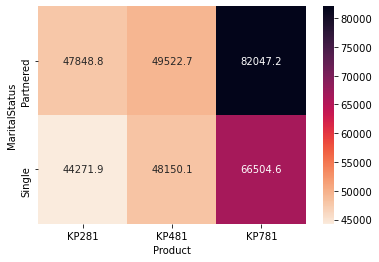

In [115]:
cross =pd.crosstab(index = df['MaritalStatus'],columns = df['Product'],values = df['Income'], aggfunc=np.mean).round(2)
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g');


### People with higher income > 66k prefer KP-781 whereas with income ~45k, they prefer KP-281

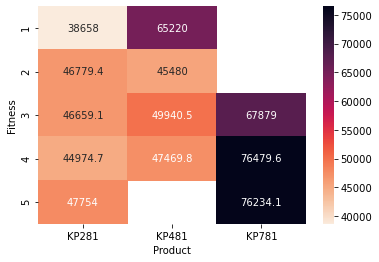

In [116]:
cross =pd.crosstab(index = df['Fitness'],columns = df['Product'],values = df['Income'], aggfunc=np.mean).round(2)
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g');

### again, people who rate themselves >3 in fitness scale are higher income people with salary > 66k prefer KP-781 product whereas people who have salary ~45k, they go for lower end product

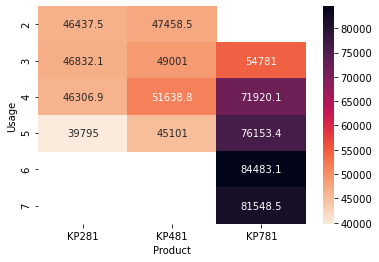

In [117]:
cross =pd.crosstab(index = df['Usage'],columns = df['Product'],values = df['Income'], aggfunc=np.mean).round(2)
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g');

### same for usage - people who plan to use more are higher income people with salary >70K and prefer KP-781

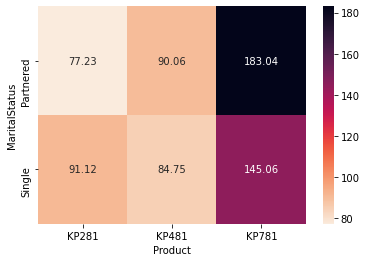

In [118]:
cross =pd.crosstab(index = df['MaritalStatus'],columns = df['Product'],values = df['Miles'], aggfunc=np.mean).round(2)
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g');

### people who plan to run more miles > 140, prefer KP-781 whereas for miles ~80, people can go either for KP-281 or KP-481

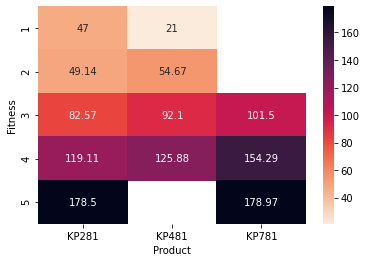

In [119]:
cross =pd.crosstab(index = df['Fitness'],columns = df['Product'],values = df['Miles'], aggfunc=np.mean).round(2)
sns.heatmap(cross, cmap='rocket_r', annot=True, fmt='g');

### interestingly, we see people who rated themselves very high on fitness and plan to cover ~180 miles, go for both KP-281 and KP-781. We can target these people and come up with suitable schemes that they switch to higher end KP-781 product
### -----

# Summary 1. (customer profiling)

### 1. There is strong correlation between usage of high-end product (KP781) with Income, Age,Education, Usage, Fitness and Miles implying higher income people are more educated, and fitness concious.

### 2. Most commonly, higher income individuals are like (irrespective of Gender): income> 60K, MaritalStatus: Partnered, usage >4days, education> 14years, fitness > 3, Miles> 100

### 3. There are people in lower income categories (~45k) who rate themselevs very high (5) on fitness scale. They use KP281. We can target these customers to switch to KP781 and come up with some schemes (flexi EMI or low-cost EMI) to make them switch to KP781.

### 4. Also, there are people who are fitness concious(3) and marital status = "partnered" and usage =12% prefer to use KP281. We can target these people to switch to KP781.

### --------------

# Summary 2. Probabilities

### 1. probability distribution of each product: P(KP281) = 44%, P(KP481) = 33%, P(KP781) = 22%
### 2. p(using KP781|Gender=male) = 18% , p(using KP781|Education= 18) = 11%, p(using KP781|MaritalStatus= Partnered) = 13% , p(using KP781|Usage= 5) = 7%   , p(using KP781|Fitness= 5) = 16%
### 3. p(using KP281|Gender=male) = 22% , p(using KP281|Education= 16) = 22%, p(using KP281|MaritalStatus= Partnered) = 27% , p(using KP281|Usage= 4) = 12%   , p(using KP281|Fitness= 3) = 30%


